## Assesment of Prominent Wind Direction

The objective of this analysis is to assess the prominent wind direction of the site of my proposed architectural project. 

```
wkt = Ranchi, POINT(23.344315 85.296013)
```

The steps involved are as follows:
- Collect Wind Data from NREL API for location of site. 
- Preprocess wind data table using pandas and keep only relevant information
- Group data according to requirements  below and use plotly to visualize the tables
    - Month-wise Prominent direction of wind
    - Prominent Wind Direction for entire year
- Derive Conclusions about Prominent Wind Dir.

In [1]:
import pandas as pd

In [2]:
MONTH_IDX_NAME_MAP = {
    1: "January",  2: "February",  3: "March",  4: "April", 
    5: "May",  6: "June",  7: "July",  8: "August", 
    9: "September",  10: "October",  11: "November", 12: "December"
}

### Data Preprocessing

In [14]:
df = pd.read_csv('./wind_data_2014.csv')
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'air pressure at 40m (Pa)',
       'temperature at 100m (C)', 'temperature at 120m (C)',
       'temperature at 40m (C)', 'temperature at 80m (C)',
       'wind direction at 100m (deg)', 'wind direction at 120m (deg)',
       'wind direction at 40m (deg)', 'wind direction at 80m (deg)',
       'wind speed at 100m (m/s)', 'wind speed at 120m (m/s)',
       'wind speed at 40m (m/s)', 'wind speed at 80m (m/s)',
       'air pressure at 100m (Pa)'],
      dtype='object')

In [18]:
required_cols = [
    'Month', 'Day', 'Hour', 'air pressure at 40m (Pa)', 
    'temperature at 40m (C)',  'wind direction at 40m (deg)', 'wind speed at 40m (m/s)'
]
df[required_cols].head()

,Month,Day,Hour,air pressure at 40m (Pa),temperature at 40m (C),wind direction at 40m (deg),wind speed at 40m (m/s)
0,1,1,0,93970,13.35,328.27,6.01
1,1,1,1,94000,12.88,330.42,6.26
2,1,1,2,94050,13.84,333.02,4.96
3,1,1,3,94090,16.18,335.64,5.56
4,1,1,4,94110,17.92,330.34,5.53


In [5]:
rename_dict = {
    "temperature at 40m (C)": "temperature",
    "wind speed at 40m (m/s)": "wind_speed",
    "air pressure at 40m (Pa)": "air_pressure",
    "wind direction at 40m (deg)": "wind_angle",
}

data = df[required_cols].rename(rename_dict, axis = 1)

In [6]:
def degree_to_direction(degree):
    val = int((degree/22.5)+.5)
    arr=["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
    return arr[val % 16]
    
data['wind_dir'] = data.apply(lambda x: degree_to_direction(x['wind_angle']), axis = 1)

In [28]:
data

,Month,Day,Hour,air_pressure,temperature,wind_angle,wind_speed,wind_dir
0,1,1,0,93970,13.35,328.27,6.01,NNW
1,1,1,1,94000,12.88,330.42,6.26,NNW
2,1,1,2,94050,13.84,333.02,4.96,NNW
3,1,1,3,94090,16.18,335.64,5.56,NNW
4,1,1,4,94110,17.92,330.34,5.53,NNW
...,...,...,...,...,...,...,...,...
8755,12,31,19,93730,15.18,102.19,5.44,ESE
8756,12,31,20,93750,14.56,106.66,5.44,ESE
8757,12,31,21,93750,14.34,108.27,4.62,ESE
8758,12,31,22,93750,14.51,113.78,4.24,ESE


## Plots

In [8]:
import plotly.express as px
import plotly.graph_objects as go

### Prominent Wind Direction for the whole Year

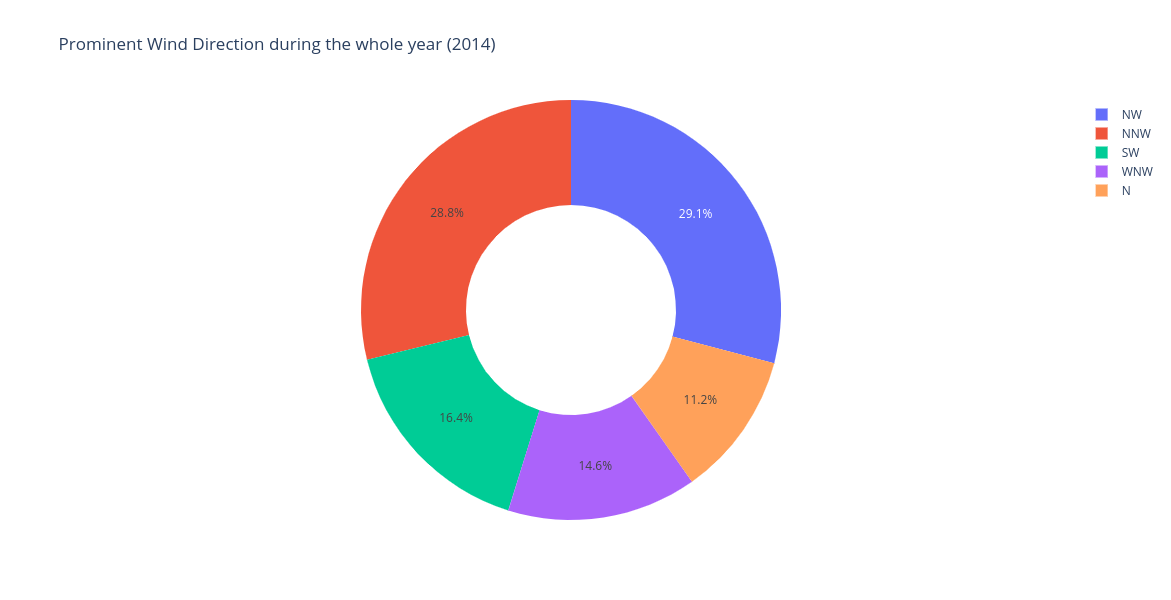

In [15]:
figure = go.Figure(layout=go.Layout(width=800, height=600, title = "Prominent Wind Direction during the whole year (2014)"))

temp = (data.groupby('wind_dir').count()
        .Month.sort_values(ascending=False)
        .rename('counts', axis = 1)
        .head(5).to_frame().reset_index()
       )

figure.add_trace(
        go.Pie(labels = temp['wind_dir'], values = temp['counts'], visible = True, hole = 0.5)
    )

figure.show()

### Prominent Wind Direction for Individual Months

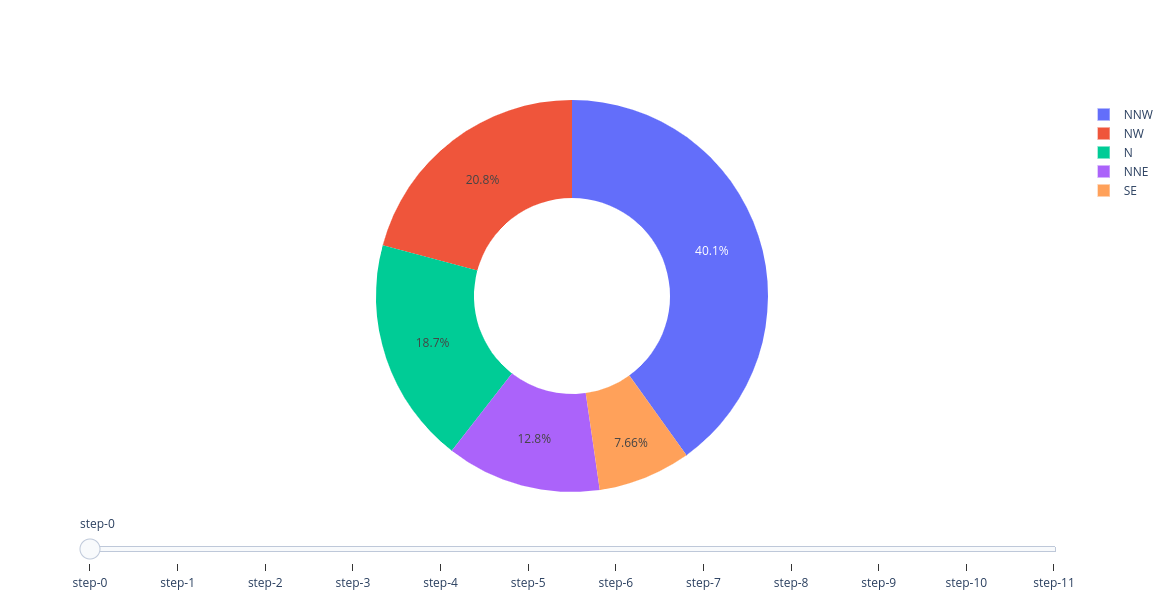

In [19]:
figure = go.Figure(layout=go.Layout(width=800, height=600))

for slider_step in range(1, 12+1):
    month_idx = slider_step
    temp = (data[data['Month'] == month_idx]
            .groupby('wind_dir').agg('count')
            .sort_values('Month', ascending = False)
            .Month.rename('counts', axis = 1)
            .head(5).to_frame().reset_index()
    )
    
    figure.add_trace(
        go.Pie(labels = temp['wind_dir'], values = temp['counts'], visible = False, hole = 0.5)
    )

figure.data[-1].visible = True
steps = []

for i in range(1, 12+1):
    step = dict(
        method="update", 
        args=[{"visible": [False] * len(figure.data)},
              {"title": "Prominent Wind Direction for Month of " + MONTH_IDX_NAME_MAP[i]}],
        )
    step["args"][0]["visible"][i - 1] = True
    steps.append(step)

sliders = [dict(active=12, steps=steps)]
figure.update_layout(sliders=sliders, autosize=True)

## Conclusions

We can derive the following conclusions from this brief analysis.

1. The prominent wind dir. for most of the year is NW
2. In the summer months, we can see that NNW direction also becomes somewhat prominent

#### Actionable Design Insights

- The placement of sewage treatment plant (STP) is proposed in the **SE** direction because NW is the prominent wind direction and hence the foul smell generated from the STP is taken away from the site.

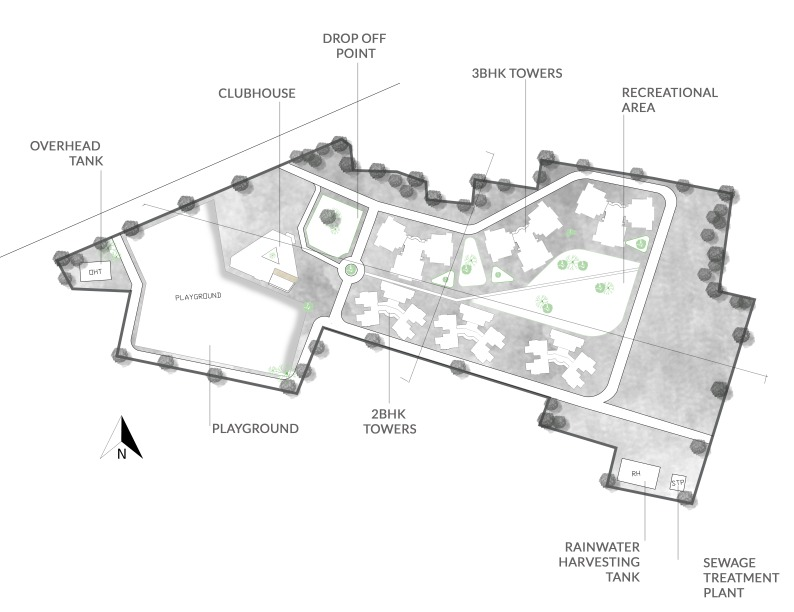